In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the dataset
df=pd.read_csv("C:\\Users\\Varsha\\OneDrive\\Desktop\\Varsha\\elevate labs\\task 5\\titanic dataset.csv")
df.describe() #Provides summary statistics of numerical & (optionally categorical) columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info() #Gives a summary of the DataFrame, involving data types and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.value_counts() #Returns a count of unique values in one column. 
#It's great for understanding the distribution of categorical variables or checking for imbalances in data.

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [6]:
print(df.shape) # gives the number of cases and the no. of variables
df.isnull().sum() #This will show the number of missing values in each column.

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isnull().sum().sum() #This will show the number of missing values in the dataset.

866

There are 866 missing values in the dataset.
We shall handle the missing cases either by removing the corresponding rows with missing vlaues, or by replacing the missing cells with mean,median or mode. 
Since there is 866 missing values which is more than 50% of the total no. of rows, dropping cannot be used.
Instead here I am going to replace them by median value in case of age, and mark unknown in case of cabin.

In [8]:
df['Cabin']=df['Cabin'].fillna('Unknown') #fill unknown inplace of missing values
print(df['Cabin'])

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object


In [9]:
df['Age'] # age of 888th row is missing here 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Age'] #age corresponding to 888th row is replaced by the median of age, 26

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Text(0.5, 1.0, 'Distribuition of Age')

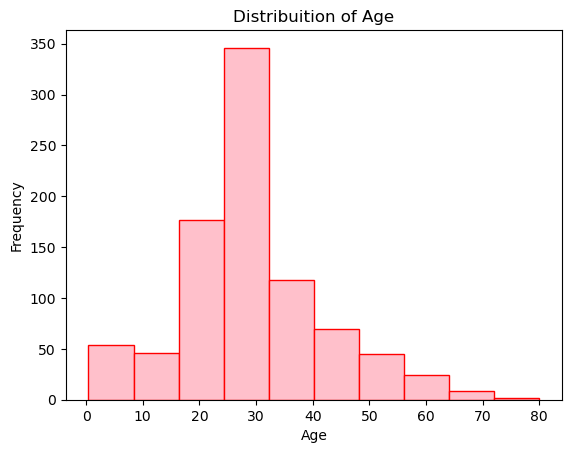

In [11]:
df['Age'].hist(bins=10,color='pink',edgecolor='red',grid=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribuition of Age')

The age distribution is right-skewed, with most passengers between 20 and 40 years old.
There's a peak in the 20–30 age group, indicating that a large portion of passengers were young adults.
Fewer children (ages 0–10) and elderly passengers (60+) were on board.

Text(0.5, 1.0, 'Fare Distribuition')

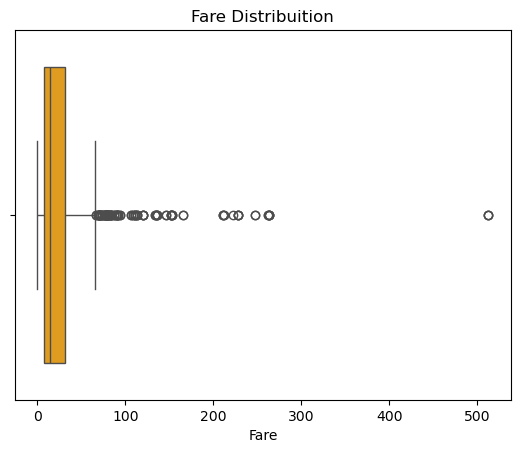

In [12]:
sns.boxplot(x=df['Fare'],color='orange')
plt.title('Fare Distribuition')

Fare distribution is highly skewed, with several extreme outliers on the higher end (>200).
Most passengers paid low fares (left-skewed distribution).

<Axes: xlabel='Survived', ylabel='count'>

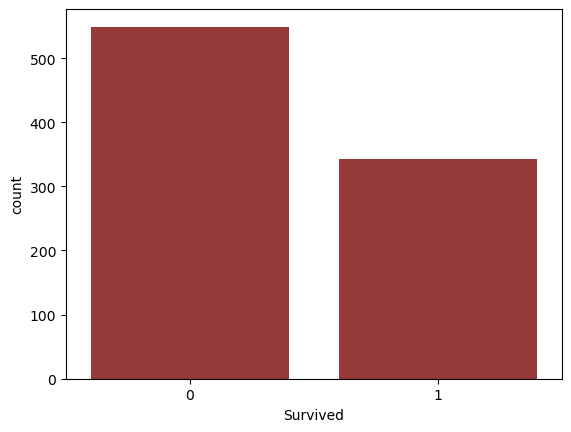

In [13]:
sns.countplot(x=df['Survived'],color='brown')

From the chart we can conclude that, majority of them didn't survive.

<Axes: xlabel='Pclass', ylabel='count'>

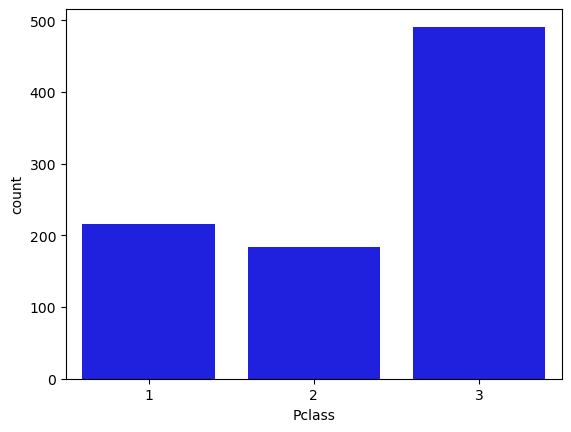

In [14]:
sns.countplot(x=df['Pclass'],color='blue')

From the chart we can conclude that, most of the passengers were in 3rd class.

<Axes: xlabel='Sex', ylabel='count'>

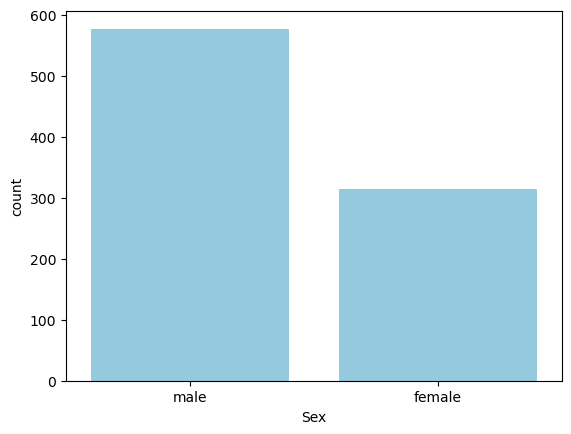

In [15]:
sns.countplot(x=df['Sex'],color='skyblue')

Most of the passengers were male.

<Axes: xlabel='Embarked', ylabel='count'>

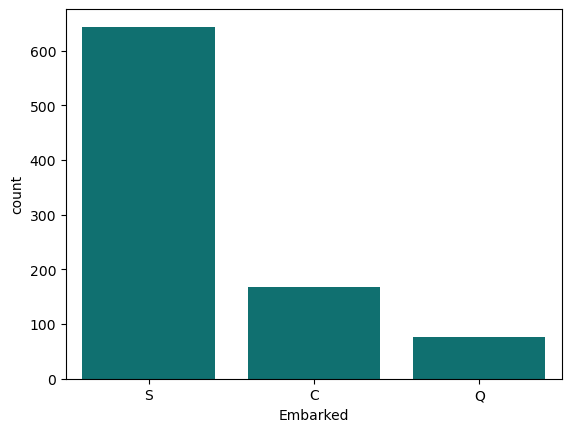

In [16]:
sns.countplot(x=df['Embarked'],color='teal')

From the chart we can conclude that, majority embarked from S

Now we shall compare the various features with target (Survived)

<Axes: xlabel='Survived', ylabel='Age'>

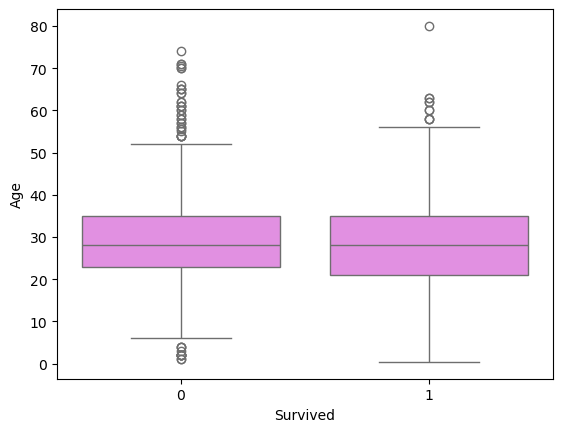

In [17]:
sns.boxplot(x=df['Survived'], y=df['Age'],color='violet')

Median age is roughly similar for survivors and non-survivors (~28–30 years).

Survivors include more young children (age <10).

More outliers (elderly) exist among non-survivors, indicating older passengers had lower chances of survival.

<Axes: xlabel='Survived', ylabel='count'>

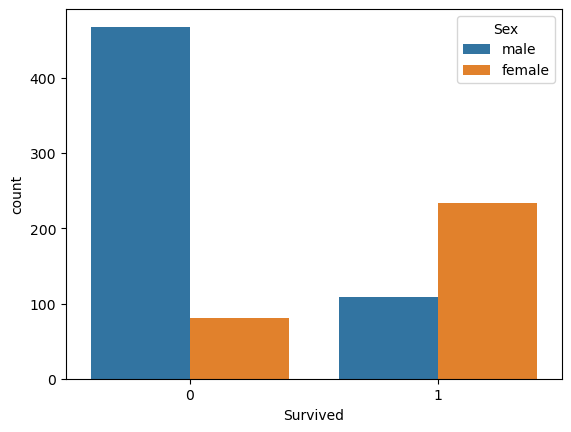

In [18]:
sns.countplot(x=df['Survived'], hue=df['Sex'])

Chart implies higher survival for Women.

<Axes: xlabel='Survived', ylabel='count'>

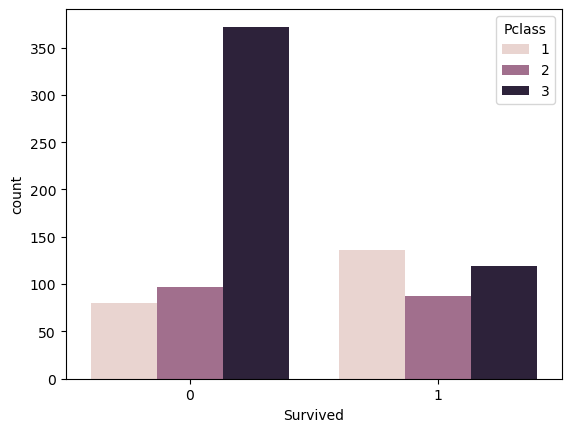

In [19]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])

Passengers in 3rd class had lower chances of survival, while most of the passengers of 1st class survived.

<Axes: xlabel='Survived', ylabel='Fare'>

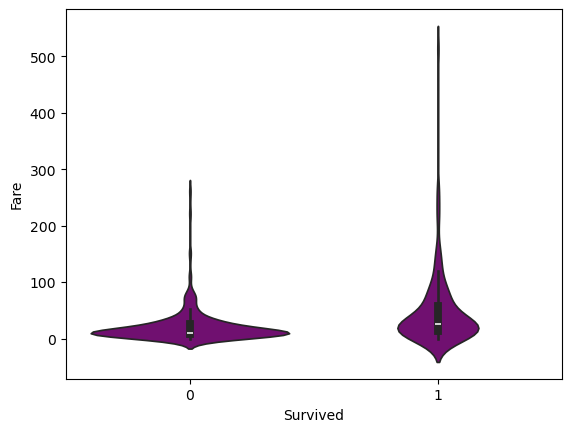

In [20]:
sns.violinplot(x=df['Survived'], y=df['Fare'],color='purple')

Survivors tend to have higher fare distributions, while most non-survivors paid lower fares.

The distribution is skewed, with some survivors paying exceptionally high fares (long upper tail).

Hence it is reasonable to conclude that Fare is a significant indicator of survival—higher.

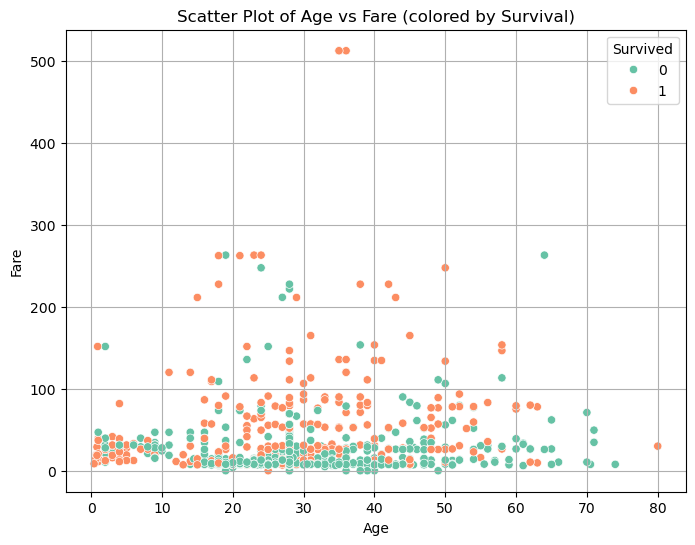

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['Age'], y=df['Fare'], hue=df['Survived'], palette='Set2')
plt.title('Scatter Plot of Age vs Fare (colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)

Passengers who paid higher fares were more likely to survive, indicating that higher fare-paying passengers (likely in 1st class) has better survival odds.

Younger passengers tend to cluster at lower fare value.

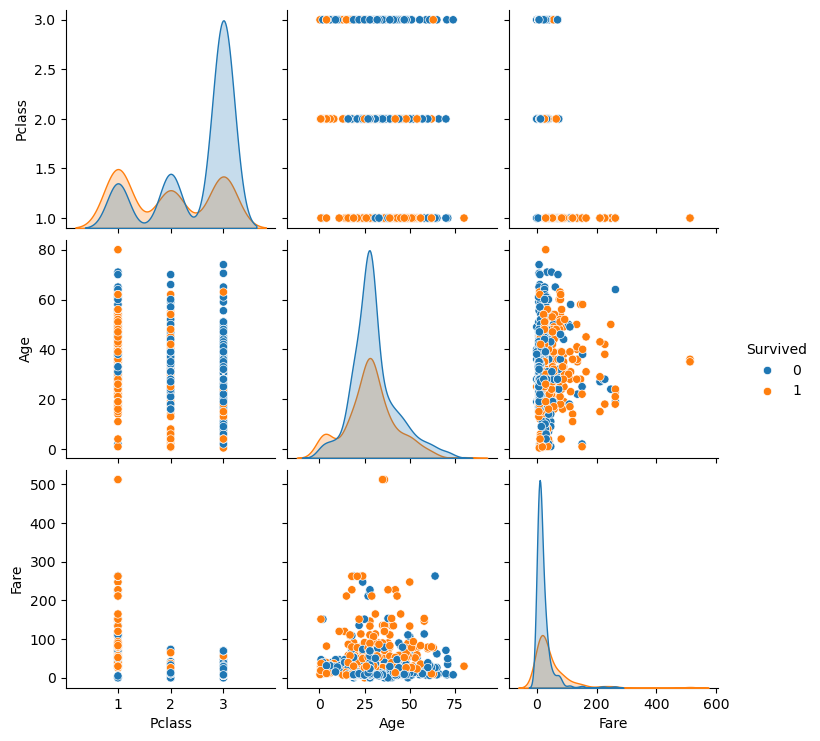

In [22]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')

Most passengers are in 3rd class with a wider age range but lower survival.

Survivors cluster more in 1st class, are younger, and paid higher fares.

<Axes: >

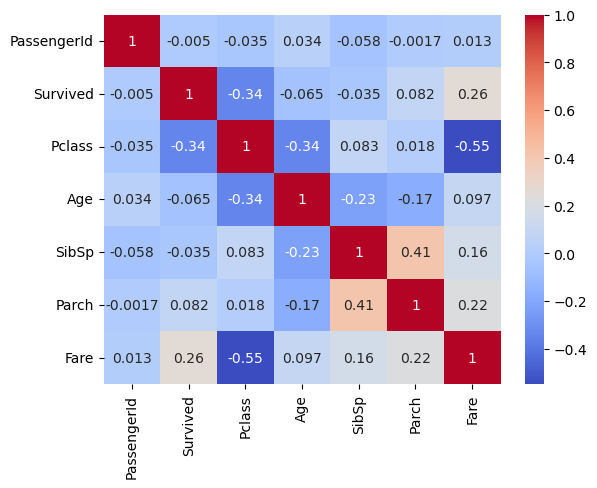

In [23]:
# Correlation Heatmap
# Only keep numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

Survival is negatively correlated with Pclass (-0.34) implying that lower class passengers had lower survival rates.

Fare and Pclass have a strong negative correlation (-0.55) which concludes that passengers in 1st class paid higher fares.

Other features like Age, SibSp, and Parch have relatively weak correlations with survival.

So it is best to focus more on Pclass and Fare as important predictors.

Summary of Findings

Women had a significantly higher survival rate than men.

Passengers in 1st class had better chances of survival.

Age and fare played moderate roles — younger and higher-paying passengers tended to survive more.

Embarked location and number of siblings/parents affected survival somewhat.